In [2]:
options(mc.cores = parallel::detectCores())
library(tidyverse, quietly=TRUE, verbose=FALSE)
library(rethinking, quietly=TRUE, verbose=FALSE)
library(dagitty, quietly=TRUE, verbose=FALSE)

In [3]:
d <- sim_happiness(seed=1997, N_years=1000)

d2 <- d[ d$age>17 , ] # only adults
d2$A <- ( d2$age - 18 ) / ( 65 - 18 )
d2$mid <- d2$married + 1

In [4]:
m6.9 <- ulam(
          alist(
              happiness ~ dnorm(mu, sigma),
              mu <- a[mid] + bA*A,
              a[mid] ~ dnorm(0,1),
              bA ~ dnorm(0,2),
              sigma ~ dexp(1)
              ), data=d2, chains=4, cores=4, log_lik=TRUE, message=FALSE)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpRymVgd/model-27efc16d7fb59.stan', line 21, column 4 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 

In [7]:
m6.10 <- ulam(
          alist(
              happiness ~ dnorm(mu, sigma),
              mu <- a + bA*A,
              a ~ dnorm(0,1),
              bA ~ dnorm(0,2),
              sigma ~ dexp(1)
              ),
          data=d2, chains=4, cores=4, log_lik=TRUE, message=FALSE)

Running MCMC with 4 parallel chains, with 1 thread(s) per chain...

Chain 1 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 1 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 1 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 1 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpRymVgd/model-27efc235d9451.stan', line 21, column 4 to column 37)

Chain 1 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 1 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 1 



Chain 2 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 2 Iteration: 100 / 1000 [ 10%]  (Warmup) 
Chain 3 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 3 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 3 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 3 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpRymVgd/model-27efc235d9451.stan', line 21, column 4 to column 37)

Chain 3 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 3 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 3 



Chain 4 Iteration:   1 / 1000 [  0%]  (Warmup) 
Chain 4 Iteration: 100 / 1000 [ 10%]  (Warmup) 


Chain 4 Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:

Chain 4 Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/tmp/RtmpRymVgd/model-27efc235d9451.stan', line 21, column 4 to column 37)

Chain 4 If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,

Chain 4 but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Chain 4 



Chain 1 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 2 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 3 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 4 Iteration: 200 / 1000 [ 20%]  (Warmup) 
Chain 1 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 2 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 3 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 4 Iteration: 300 / 1000 [ 30%]  (Warmup) 
Chain 1 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 3 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 1 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 1 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 3 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 3 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 400 / 1000 [ 40%]  (Warmup) 
Chain 2 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 2 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 4 Iteration: 500 / 1000 [ 50%]  (Warmup) 
Chain 4 Iteration: 501 / 1000 [ 50%]  (Sampling) 
Chain 1 Iteration: 600 / 1000 [ 

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (seconds):
        warmup sample total
chain:1   0.76   0.70  1.46
chain:2   0.78   0.74  1.52
chain:3   0.71   0.66  1.37
chain:4   0.72   0.64  1.36

Formula:
happiness ~ dnorm(mu, sigma)
mu <- a[mid] + bA * A
a[mid] ~ dnorm(0, 1)
bA ~ dnorm(0, 2)
sigma ~ dexp(1)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a[1],-0.1678654,0.06419987,-0.2684743,-0.06294982,833.4630,0.999489
a[2],1.3567512,0.08895006,1.2199119,1.49856365,949.8116,1.002095
bA,-0.8067524,0.11519244,-0.9924134,-0.61693524,814.1780,1.000249
sigma,0.9956211,0.02223980,0.9600688,1.03285220,1156.3660,1.003590


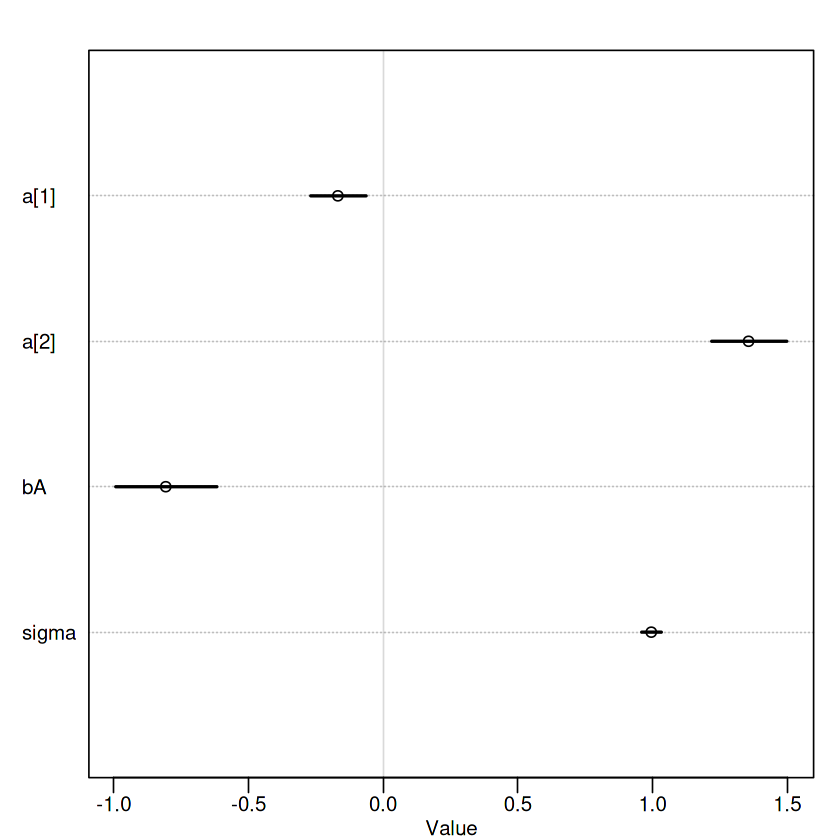

In [8]:
m6.9
precis(m6.9, depth=2)
plot(precis(m6.9, depth=2))

Hamiltonian Monte Carlo approximation
2000 samples from 4 chains

Sampling durations (seconds):
        warmup sample total
chain:1   0.74   0.68  1.41
chain:2   0.75   0.68  1.43
chain:3   0.72   0.63  1.35
chain:4   0.74   0.60  1.33

Formula:
happiness ~ dnorm(mu, sigma)
mu <- a + bA * A
a ~ dnorm(0, 1)
bA ~ dnorm(0, 2)
sigma ~ dexp(1)

,mean,sd,5.5%,94.5%,n_eff,Rhat4
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.005288712,0.07949052,-0.1216962,0.1311436,731.4871,1.003171
bA,-0.007601665,0.13608536,-0.2318874,0.2041916,745.1934,1.003315
sigma,1.215833985,0.02788084,1.1732312,1.2627222,891.7837,1.004857


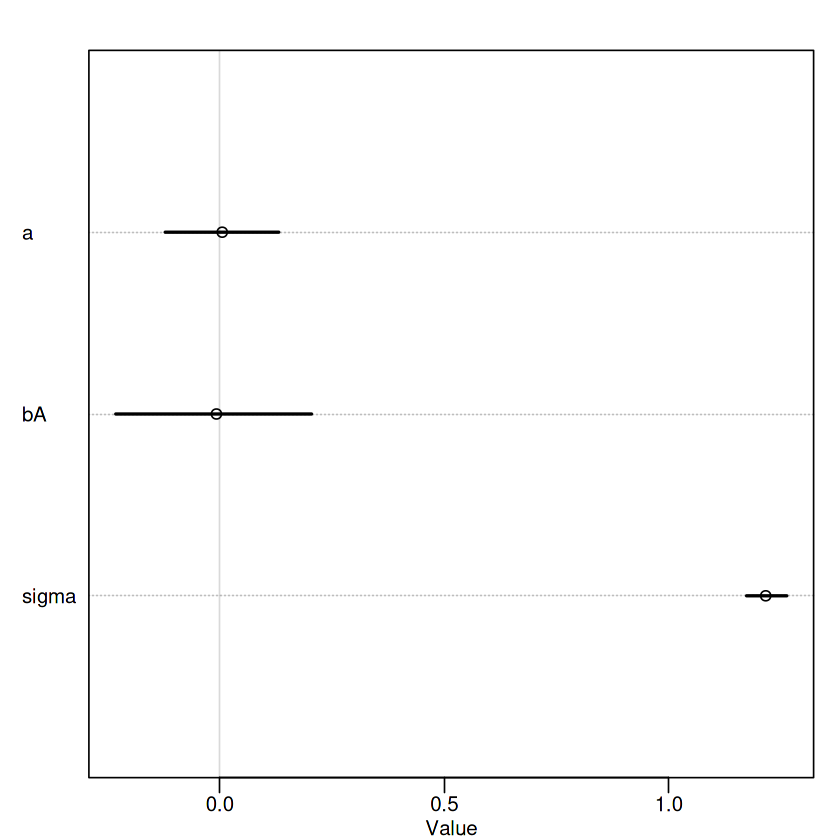

In [9]:
m6.10
precis(m6.10)
plot(precis(m6.10))

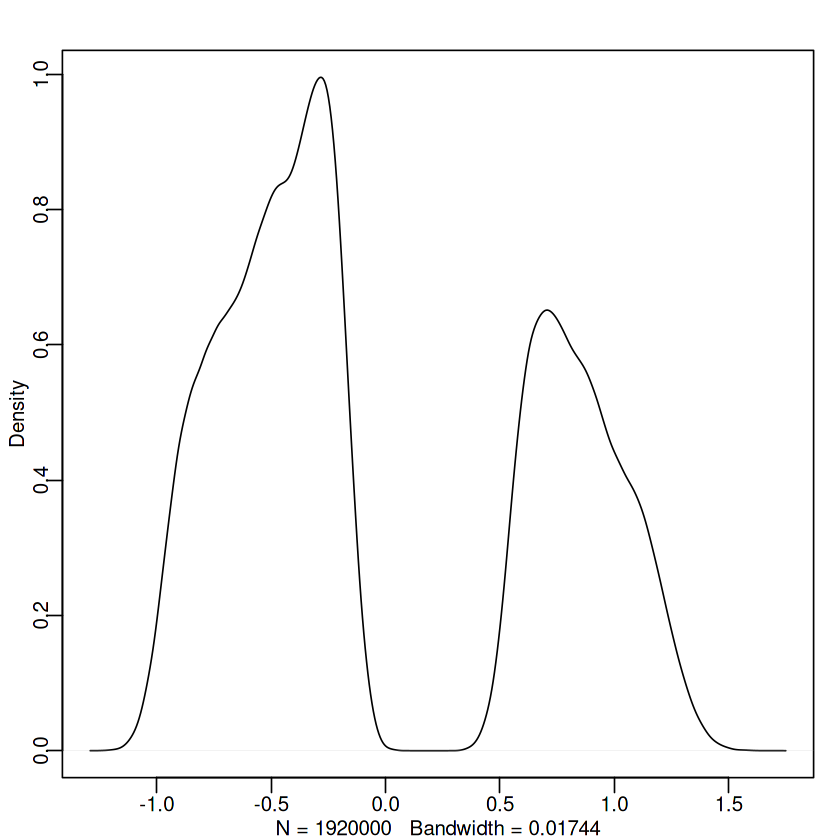

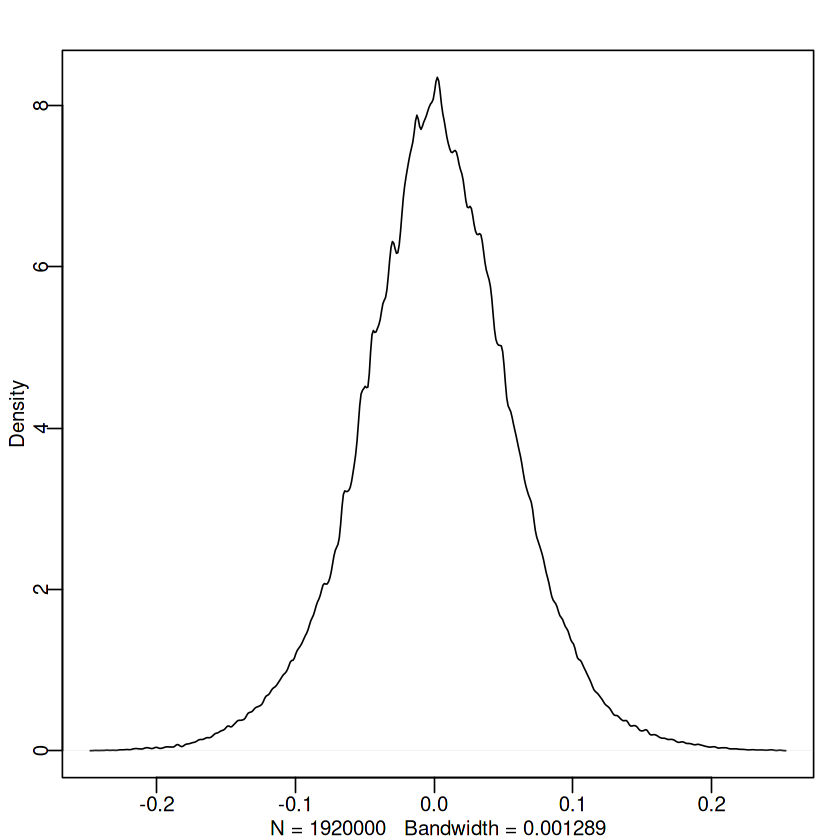

In [18]:
mu6.9 <- link(m6.9, data=d2)
mu6.10 <- link(m6.10, data=d2)
dens(mu6.9)
dens(mu6.10)

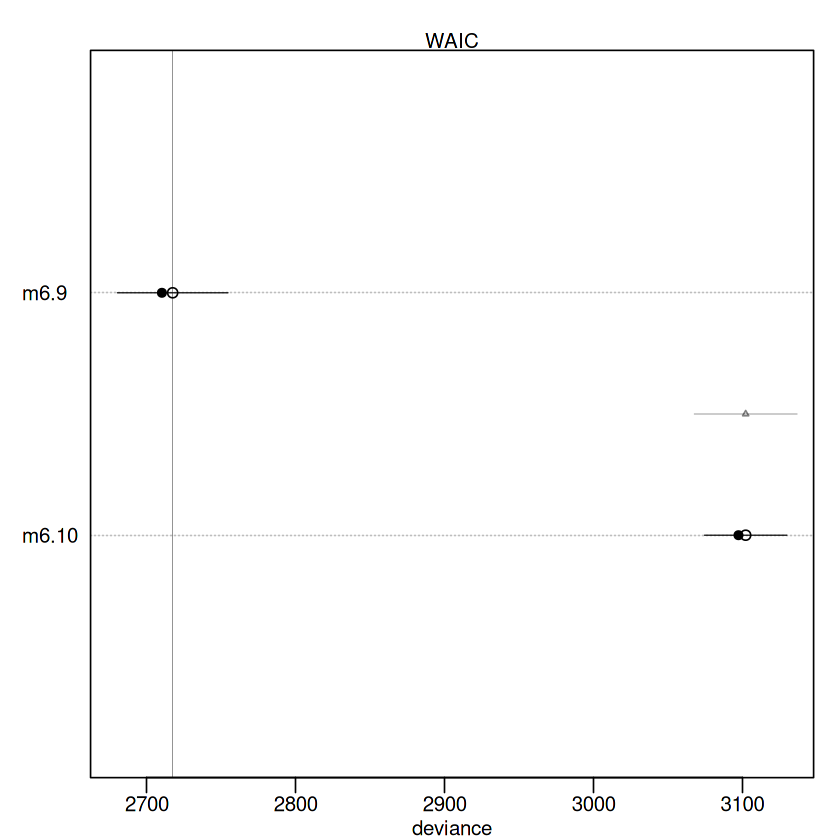

In [20]:
plot(compare(m6.9 , m6.10))

In [28]:
compare(m6.9 , m6.10)

,WAIC,SE,dWAIC,dSE,pWAIC,weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m6.9,2717.252,37.14224,0.0000,NA,3.612242,1.000000e+00
m6.10,3102.074,27.63309,384.8217,34.56076,2.419354,2.735506e-84
